In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas
import numpy as np
from sklearn import tree
import sklearn.linear_model as lm
from sklearn import preprocessing, model_selection, pipeline
from sklearn import metrics
from sklearn.inspection import permutation_importance
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.feature_selection import RFE
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn import svm
#import pydotplus
import os

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

In [2]:
np.set_printoptions(precision=3)
pandas.set_option("display.precision", 3)

classification_scores = ['accuracy','precision_weighted',
                         'recall_weighted', 'roc_auc_ovr_weighted',
                         'f1_weighted']

%matplotlib inline

<font size="6"><div align="center"><span style="color:blue">Reading and understanding the dataset</span></div></font>

In [3]:
df_churn = pandas.read_csv('churn.csv')
churn_target_col = 'churn_risk_score'
churn_label_map = df_churn[['churn_risk_score', 'churn_risk_score']].drop_duplicates()

In [4]:
drop_cols = ['churn_risk_score']
df_churn.head()

,Unnamed: 0,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,0,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,0
1,1,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,Gift Vouchers/Coupons,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,0
2,2,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,1
3,3,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,1
4,4,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,1


In [5]:
df_churn.dtypes

Unnamed: 0                        int64
age                               int64
gender                           object
security_no                      object
region_category                  object
membership_category              object
joining_date                     object
joined_through_referral          object
referral_id                      object
preferred_offer_types            object
medium_of_operation              object
internet_option                  object
last_visit_time                  object
days_since_last_login             int64
avg_time_spent                  float64
avg_transaction_value           float64
avg_frequency_login_days         object
points_in_wallet                float64
used_special_discount            object
offer_application_preference     object
past_complaint                   object
complaint_status                 object
feedback                         object
churn_risk_score                  int64
dtype: object

In [6]:
print(df_churn.shape)
count_nan_in_df = df_churn.isnull().sum()
print (count_nan_in_df)

(36992, 24)
Unnamed: 0                         0
age                                0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64


In [7]:
df_churn['gender'].value_counts()

F          18490
M          18443
Unknown       59
Name: gender, dtype: int64

In [8]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import seaborn as sns# Carregando dataset
data = load_iris()
X = data.data
y = data.target# Criando conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)# Treinando modelo
model  = RandomForestClassifier()
model.fit(X_train, y_train)# Mostrando importância de cada feature
model.feature_importances_
#Out =array([0.12689503, 0.02375714, 0.46027916, 0.38906867])

array([0.092, 0.028, 0.435, 0.446])

In [9]:
df_churn = df_churn[df_churn.gender != 'Unknown']
df_churn['gender']=df_churn['gender'].map({'F':1,
                             'M':0},
                             na_action=None)

In [10]:
df_churn['region_category'].value_counts()

Town       14099
City       12721
Village     4693
Name: region_category, dtype: int64

In [11]:
#df_churn.fillna(df_churn['region_category']('Vazio')) #df_churn = df_churn.dropna(subset=['region_category'])
df_churn['region_category'] =  df_churn['region_category'].fillna('Vazio')

In [12]:
df_churn['membership_category'].value_counts()

Basic Membership       7710
No Membership          7681
Gold Membership        6785
Silver Membership      5979
Premium Membership     4444
Platinum Membership    4334
Name: membership_category, dtype: int64

In [13]:
df_churn['joined_through_referral'].value_counts()

No     15816
Yes    15689
?       5428
Name: joined_through_referral, dtype: int64

In [14]:
#df_churn["joined_through_referral"].replace({"?": "No"}, inplace=True)
df_churn['joined_through_referral']=df_churn['joined_through_referral'].map({'Yes':1,
                             'No':-1, '?':0},
                             na_action=None)


In [15]:
df_churn['referral_id'].value_counts()

xxxxxxxx    17817
CID43705       12
CID3979        11
CID49601       10
CID62015        9
            ...  
CID23663        1
CID23071        1
CID56973        1
CID16388        1
CID45477        1
Name: referral_id, Length: 11349, dtype: int64

In [16]:
df_churn['preferred_offer_types'].value_counts()

Gift Vouchers/Coupons       12322
Credit/Debit Card Offers    12256
Without Offers              12068
Name: preferred_offer_types, dtype: int64

In [17]:
#df_churn = df_churn.dropna(subset=['preferred_offer_types'])
df_churn['preferred_offer_types'] =  df_churn['preferred_offer_types'].fillna('Vazio')

In [18]:
df_churn['medium_of_operation'].value_counts()

Desktop       13893
Smartphone    13855
?              5379
Both           3806
Name: medium_of_operation, dtype: int64

In [19]:
df_churn['internet_option'].value_counts()

Wi-Fi          12393
Mobile_Data    12327
Fiber_Optic    12213
Name: internet_option, dtype: int64

In [20]:
df_churn['last_visit_time'].value_counts()

07:56:41    6
21:12:56    5
22:31:06    5
17:11:53    5
12:30:02    5
           ..
12:56:50    1
05:29:14    1
10:33:06    1
03:23:09    1
01:39:52    1
Name: last_visit_time, Length: 30058, dtype: int64

In [21]:
df_churn['avg_frequency_login_days'].value_counts()

Error                  3518
13.0                   1392
8.0                    1360
19.0                   1360
14.0                   1351
                       ... 
28.191570401129514        1
41.73357294995208         1
-11.515939810499656       1
45.71683637272365         1
27.8399274405269          1
Name: avg_frequency_login_days, Length: 1650, dtype: int64

In [22]:
df_churn['used_special_discount'].value_counts()

Yes    20312
No     16621
Name: used_special_discount, dtype: int64

In [23]:
df_churn['used_special_discount']=df_churn['used_special_discount'].map({'Yes':1,
                             'No':0},
                             na_action=None)

In [24]:
 df_churn['offer_application_preference'].value_counts()

Yes    20405
No     16528
Name: offer_application_preference, dtype: int64

In [25]:
df_churn['offer_application_preference']=df_churn['offer_application_preference'].map({'Yes':1,
                             'No':0},
                             na_action=None)

In [26]:
df_churn['past_complaint'].value_counts()

No     18573
Yes    18360
Name: past_complaint, dtype: int64

In [27]:
df_churn['past_complaint']=df_churn['past_complaint'].map({'Yes':1,
                             'No':0},
                             na_action=None)

In [28]:
df_churn['complaint_status'].value_counts()

Not Applicable              18573
Unsolved                     4634
Solved                       4611
Solved in Follow-up          4571
No Information Available     4544
Name: complaint_status, dtype: int64

In [29]:
df_churn['feedback'].value_counts()

Poor Product Quality        6339
No reason specified         6282
Too many ads                6270
Poor Website                6261
Poor Customer Service       6238
Reasonable Price            1417
User Friendly Website       1390
Products always in Stock    1379
Quality Customer Care       1357
Name: feedback, dtype: int64

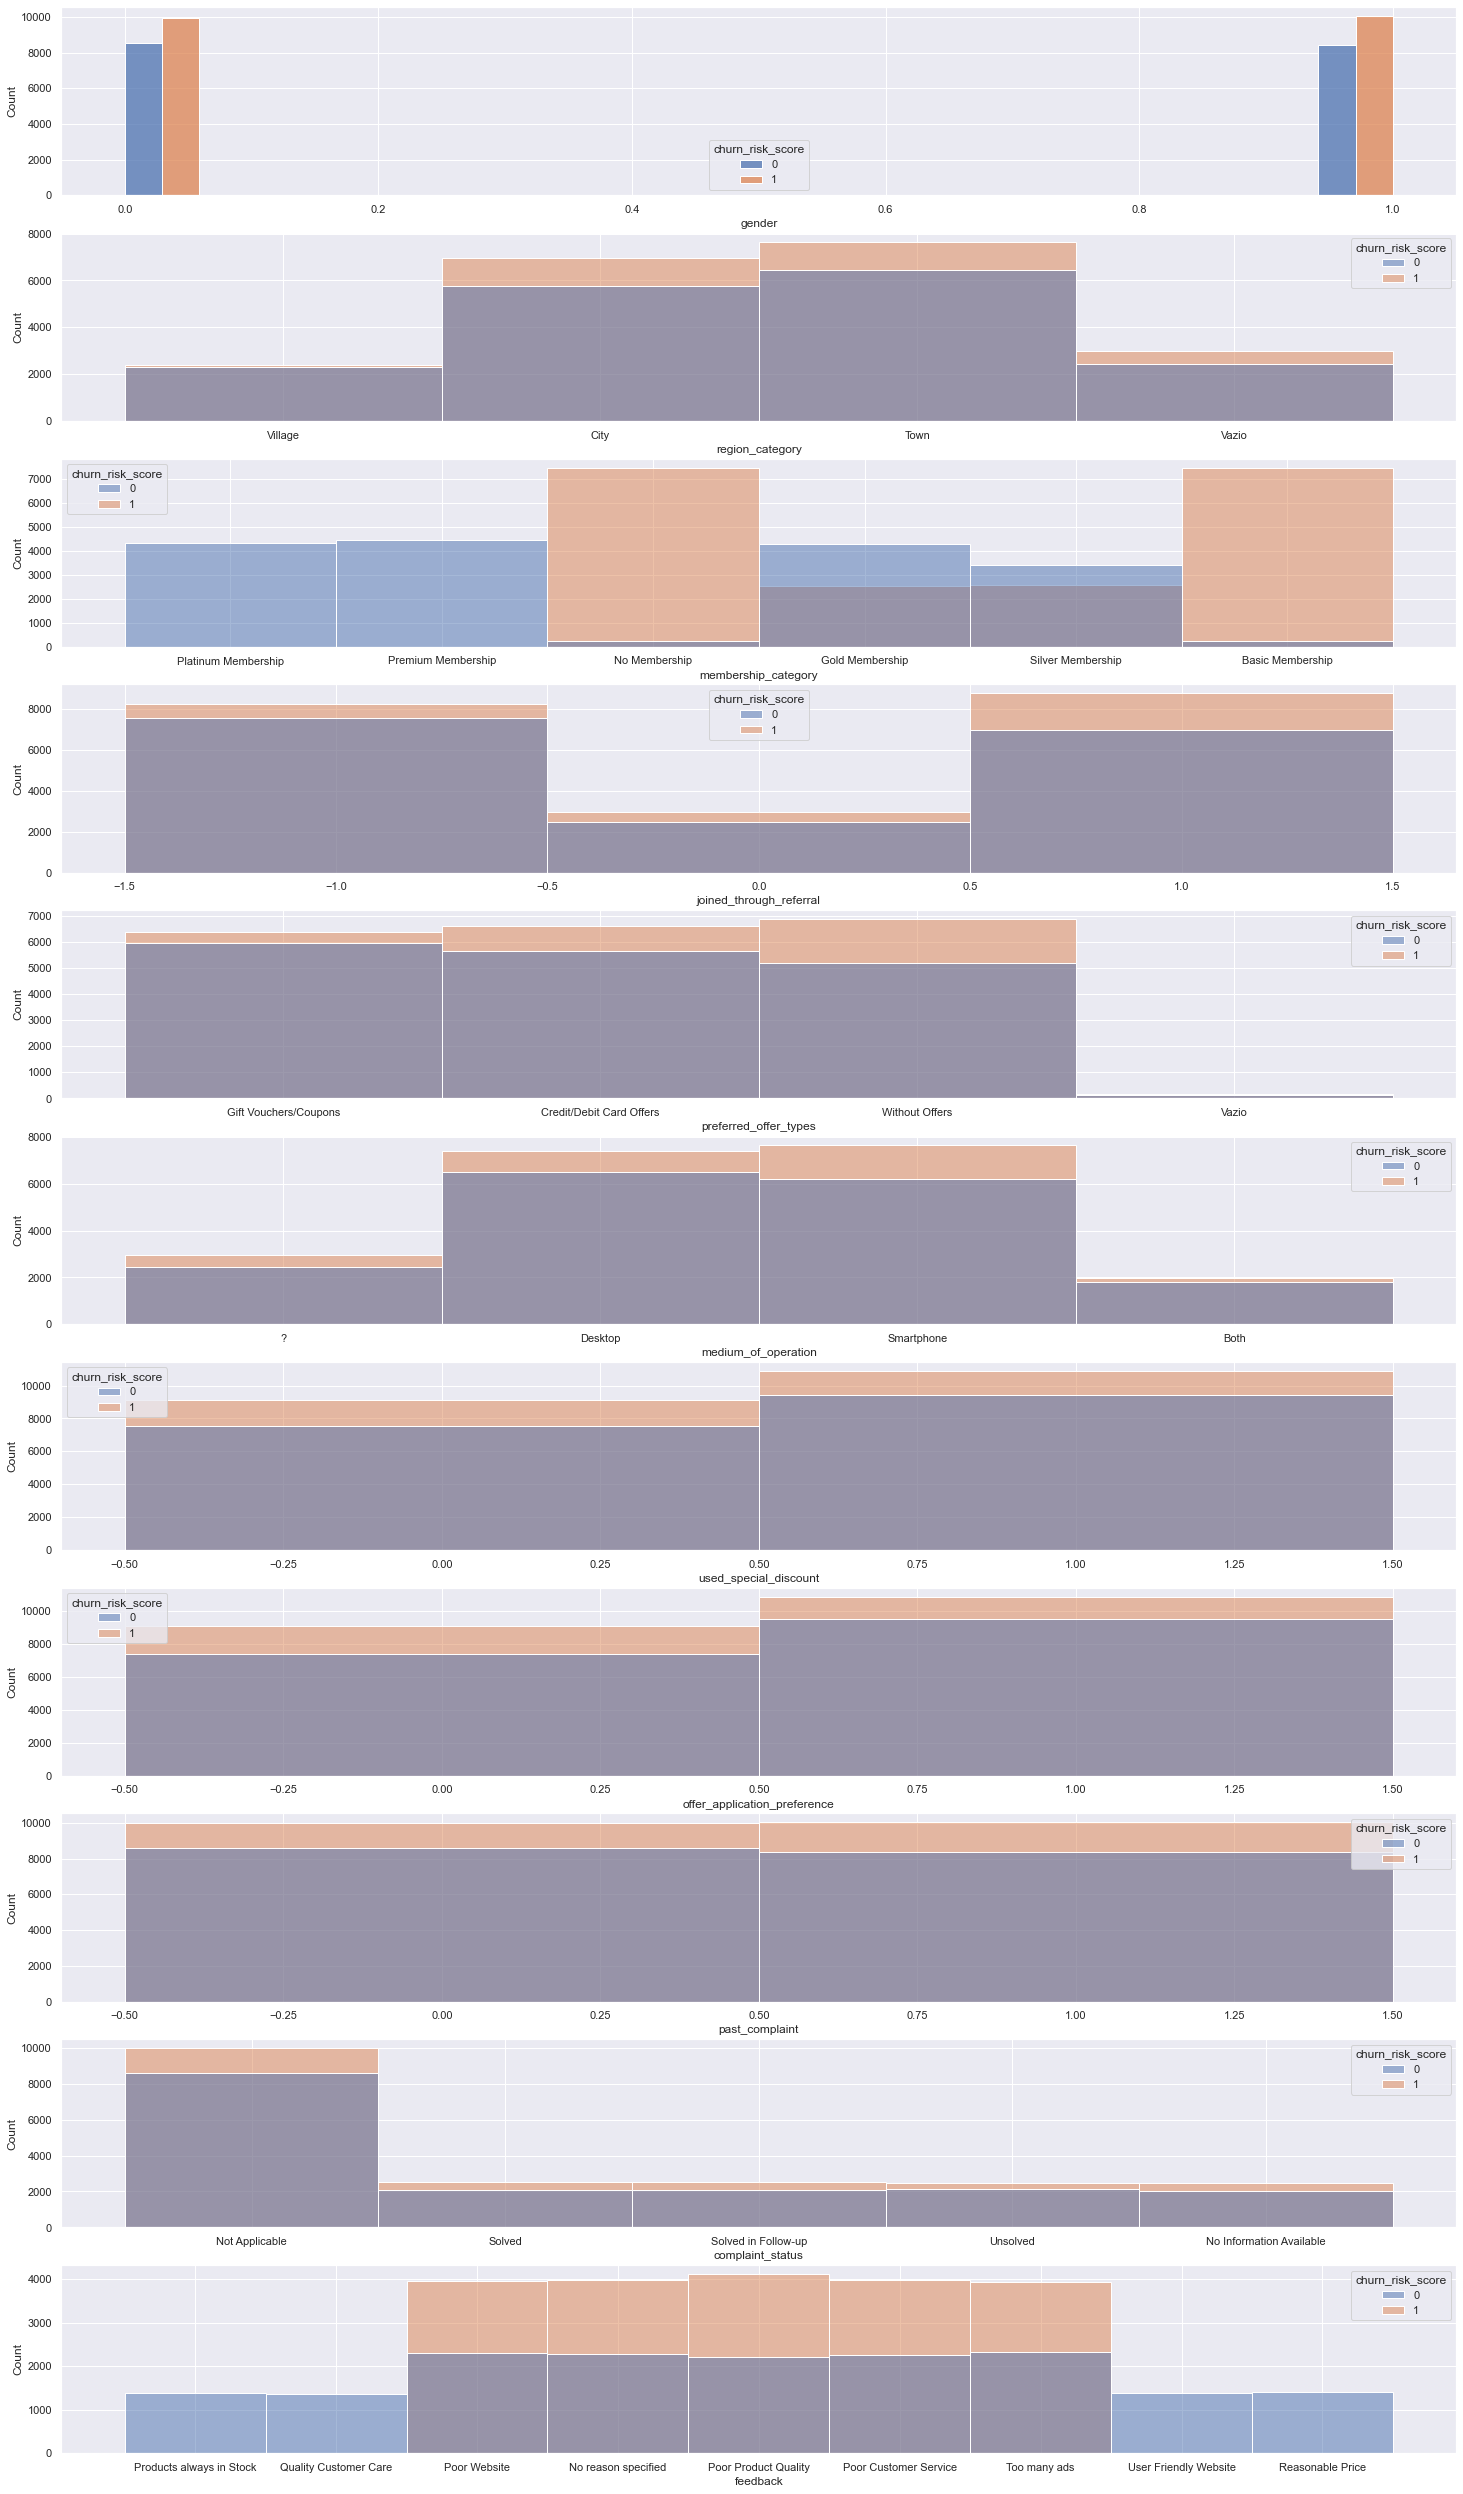

In [30]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt

# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
df = df_churn

fig, axs = plt.subplots(11, 1, figsize=(25, 45))

sns.histplot(data=df, x="gender",color="red",hue="churn_risk_score",multiple="dodge", ax=axs[0])
sns.histplot(data=df, x="region_category",hue="churn_risk_score", color="teal", discrete=True ,ax=axs[1])
sns.histplot(data=df, x="membership_category", hue="churn_risk_score", color="teal", discrete=True,ax=axs[2])
sns.histplot(data=df, x="joined_through_referral", hue="churn_risk_score", color="teal", discrete=True,ax=axs[3])
sns.histplot(data=df, x="preferred_offer_types", hue="churn_risk_score", color="teal", discrete=True,ax=axs[4])
sns.histplot(data=df, x="medium_of_operation", hue="churn_risk_score", color="teal", discrete=True,ax=axs[5])
sns.histplot(data=df, x="used_special_discount", hue="churn_risk_score", color="teal", discrete=True,ax=axs[6])
sns.histplot(data=df, x="offer_application_preference", hue="churn_risk_score", color="teal", discrete=True,ax=axs[7])
sns.histplot(data=df, x="past_complaint", hue="churn_risk_score", color="teal", discrete=True,ax=axs[8])
sns.histplot(data=df, x="complaint_status", hue="churn_risk_score", color="teal", discrete=True,ax=axs[9])
sns.histplot(data=df, x="feedback", hue="churn_risk_score", color="teal", discrete=True,ax=axs[10])



plt.show()

In [31]:
df_churn = df_churn.fillna(df_churn['points_in_wallet'].mean())

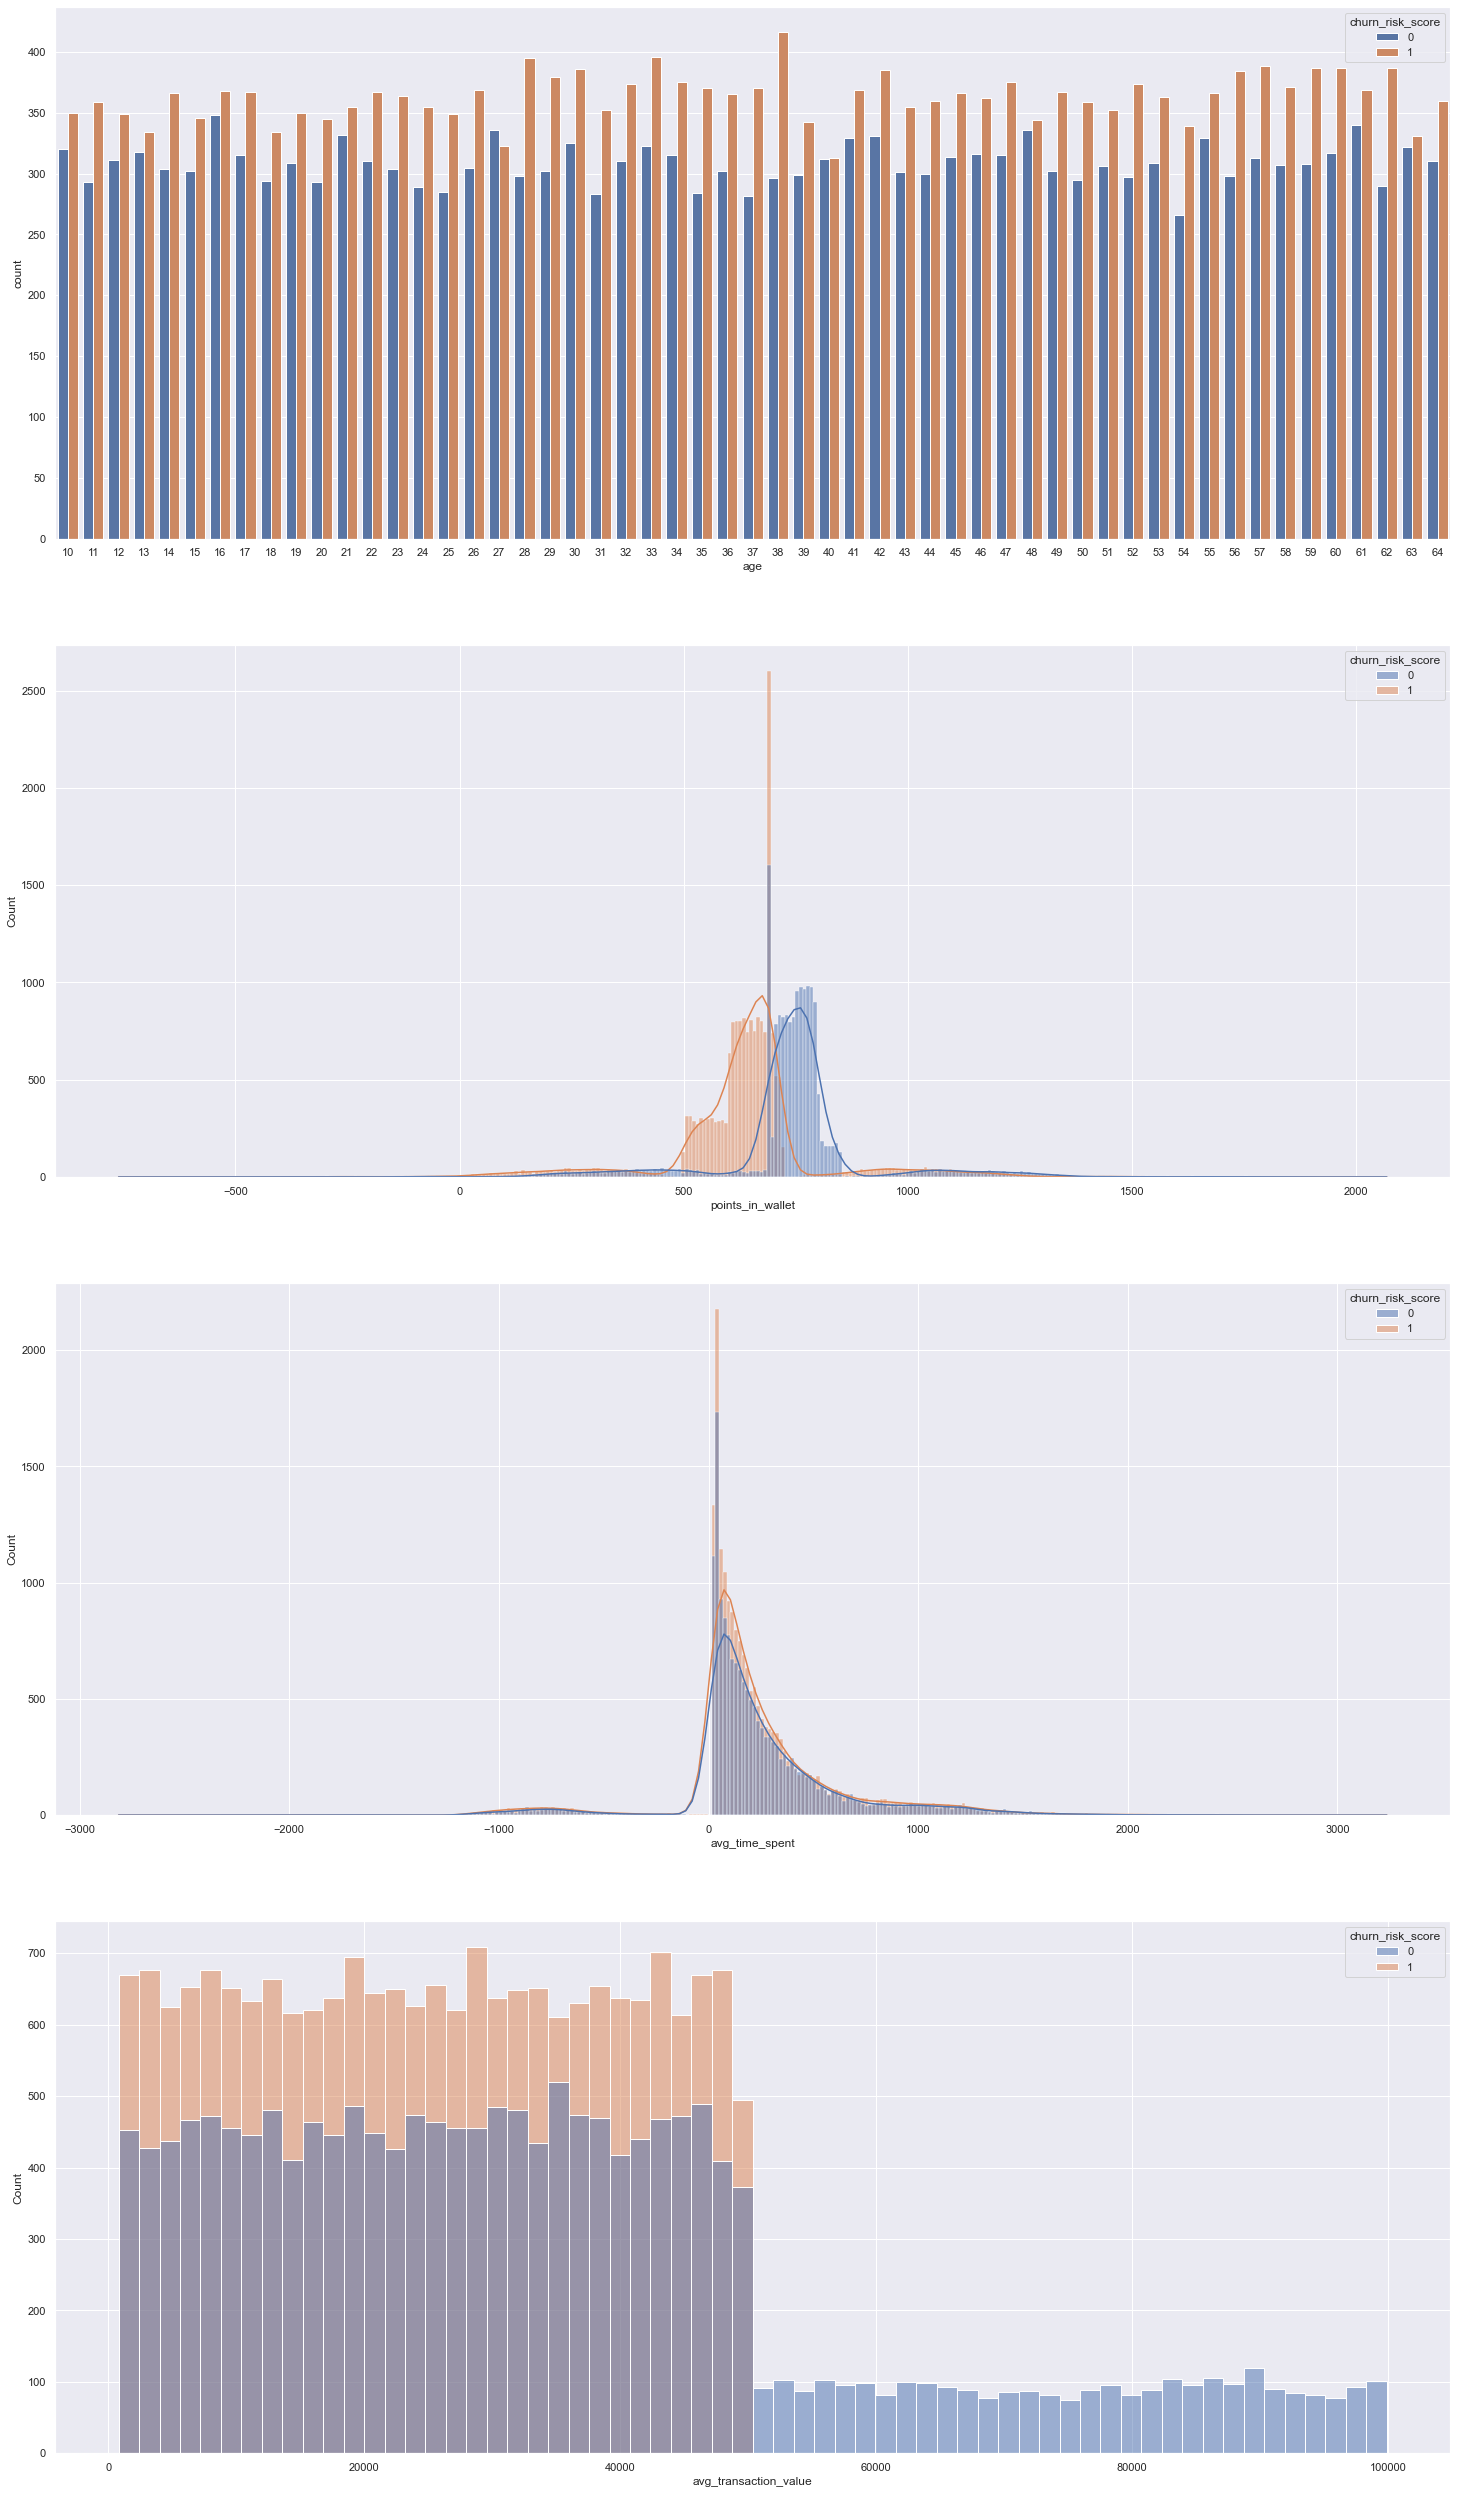

In [32]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above)
sns.set(style="darkgrid")
df = df_churn

fig, axs = plt.subplots(4, 1, figsize=(25, 45))

sns.countplot(data=df, x="age", hue="churn_risk_score", ax=axs[0])
sns.histplot(data=df, x="points_in_wallet", hue="churn_risk_score",kde=True, discrete=False,ax=axs[1])
sns.histplot(data=df, x="avg_time_spent", hue="churn_risk_score", kde=True, discrete=False,ax=axs[2])
sns.histplot(data=df, x="avg_transaction_value", hue="churn_risk_score", color="teal", discrete=False,ax=axs[3])

plt.show()

<font size="6"><div align="center"><span style="color:blue">Handling data</span></div></font>

In [33]:
categoria_idade = pandas.cut(df_churn.age,bins=[0,17,25,35,40,60,200],
                                labels=['Criança','Adulto inicial',
                                        'Adulto pleno','Adulto final',
                                        'Meia-idade','Idoso'])
df_churn.insert(2,'age_group',categoria_idade)

df_churn['feedback']=df_churn['feedback'].map({'Products always in Stock':1,
                             'User Friendly Website':1,'Reasonable Price':1,'Quality Customer Care':1,
                             'Poor Product Quality':0,'Poor Website':0,'No reason specified':0,'Too many ads':0,
                             'Poor Customer Service':0},
                             na_action=None)

df_churn['membership_category']=df_churn['membership_category'].map({'Basic Membership':'Until basic',
                             'No Membership':'Until basic','Silver Membership':'Silve and Gold','Gold Membership':'Silve and Gold',
                             'Premium Membership':'Premium and Platium','Platinum Membership':'Premium and Platium'},
                             na_action=None)

In [34]:
def absolute_maximum_scale(series):
    return series / series.abs().max()

for col in df_churn.columns:
    df_churn['avg_transaction_value'] = absolute_maximum_scale(df_churn['avg_transaction_value'])
    df_churn['points_in_wallet'] = absolute_maximum_scale(df_churn['points_in_wallet'])
    df_churn['age'] = absolute_maximum_scale(df_churn['age'])
    df_churn['avg_time_spent'] = absolute_maximum_scale(df_churn['avg_time_spent'])

In [35]:
categorical_cols = ['region_category','membership_category','preferred_offer_types','medium_of_operation','internet_option',
                   'complaint_status','feedback']

for k in categorical_cols:
    if df_churn[k].dtypes == 'object':    
        df_ = df_churn[k].unique()
        p = []
    
        for i in df_:
            for j in df_churn[k]:
                if i == j:
                    p.append(1)
                else:
                    p.append(0)
            df_churn[k + " " + i] = p
            p=[]
    else:
        p = []

In [36]:
df_churn.head()

,Unnamed: 0,age,age_group,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,medium_of_operation Smartphone,medium_of_operation Both,internet_option Wi-Fi,internet_option Mobile_Data,internet_option Fiber_Optic,complaint_status Not Applicable,complaint_status Solved,complaint_status Solved in Follow-up,complaint_status Unsolved,complaint_status No Information Available
0,0,0.281,Adulto inicial,1,XW0DQ7H,Village,Premium and Platium,2017-08-17,-1,xxxxxxxx,...,0,0,1,0,0,1,0,0,0,0
1,1,0.500,Adulto pleno,1,5K0N3X1,City,Premium and Platium,2017-08-28,0,CID21329,...,0,0,0,1,0,0,1,0,0,0
2,2,0.688,Meia-idade,1,1F2TCL3,Town,Until basic,2016-11-11,1,CID12313,...,0,0,1,0,0,0,0,1,0,0
3,3,0.578,Adulto final,0,VJGJ33N,City,Until basic,2016-10-29,1,CID3793,...,0,0,0,1,0,0,0,0,1,0
4,4,0.484,Adulto pleno,1,SVZXCWB,City,Until basic,2017-09-12,-1,xxxxxxxx,...,1,0,0,1,0,0,1,0,0,0


In [37]:
count_nan_in_df = df_churn.isnull().sum()
print (count_nan_in_df)

Unnamed: 0                                        0
age                                               0
age_group                                         0
gender                                            0
security_no                                       0
region_category                                   0
membership_category                               0
joining_date                                      0
joined_through_referral                           0
referral_id                                       0
preferred_offer_types                             0
medium_of_operation                               0
internet_option                                   0
last_visit_time                                   0
days_since_last_login                             0
avg_time_spent                                    0
avg_transaction_value                             0
avg_frequency_login_days                          0
points_in_wallet                                  0
used_special

<font size="6"><div align="center"><span style="color:blue">Developing models</span></div></font>

<font size="3"><div align="left"><span style="color:blue">Remove unwanted columns</span></div></font>

In [38]:
df_churn=df_churn.drop(columns=['Unnamed: 0','age_group','avg_frequency_login_days','region_category','security_no',
                                'membership_category','joining_date','referral_id','last_visit_time','days_since_last_login',
                               'preferred_offer_types','medium_of_operation','internet_option','complaint_status',
                               'feedback'])


#df_churn=df_churn.drop(columns=['Unnamed: 0','age','gender','age_group','security_no','region_category',
#                                'membership_category','complaint_status','joining_date','referral_id',
#                                'avg_frequency_login_days','preferred_offer_types','used_special_discount',
#                                'preferred_offer_types','medium_of_operation','internet_option','last_visit_time',
#                                'days_since_last_login','complaint_status','past_complaint','avg_time_spent',
#                                'offer_application_preference','joined_through_referral'])

In [39]:
# solver : 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'

Y = df_churn[churn_target_col]
X = df_churn.drop(churn_target_col, axis=1)

# train/test
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(X, Y, test_size=0.3)
cvfold = model_selection.StratifiedKFold(n_splits = 10, random_state = 1, shuffle=True)

df_train = xtrain.copy()
df_test = xtest.copy()
df_train['train_set'] = 1
df_test['train_set'] = 0
df_train[churn_target_col] = ytrain
df_test[churn_target_col] = ytest

In [40]:
count_row = xtrain.shape[0]

print(int(count_row*0.05))

1292


In [44]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

count_row = xtrain.shape[0]

rfe = RFE(estimator=tree.DecisionTreeClassifier(criterion="entropy", random_state=45,max_depth=15, min_samples_leaf=int(count_row*0.05)))
#          , n_features_to_select=6)
model_ = tree.DecisionTreeClassifier(criterion="entropy", random_state=45,max_depth=15, min_samples_leaf=int(count_row*0.05))



model_dt = pipeline.Pipeline([('Feature Selection', rfe), ('Model', model_)])
n_scores = cross_val_score(model_dt, xtrain, ytrain, scoring='accuracy', cv=cvfold, n_jobs=-1)
np.mean(n_scores)



model_dt.fit(xtrain, ytrain)

df_train['decision_dt'] = model_dt.predict(xtrain)
df_test['decision_dt']  = model_dt.predict(xtest)
df_train['probability_dt'] = model_dt.predict_proba(xtrain)[:,1]
df_test['probability_dt']  = model_dt.predict_proba(xtest)[:,1]

df_churn = pandas.concat((df_train, df_test), axis=0)
idxdt = df_churn['train_set'] == 0

cm_dt = metrics.confusion_matrix(df_churn[idxdt][churn_target_col],
                                  df_churn[idxdt]['decision_dt'])

In [ ]:
def nums(first_number, last_number, step=1):
    return range(first_number, last_number+1, step)

vect_lr=[]
vect_nm=[]

print(len(df_churn.columns))
pp = len(df_churn.columns)
for p in nums(1,pp):
    print(p)
    rfe = RFE(estimator=lm.LogisticRegression(), n_features_to_select=p)
    model_lr = lm.LogisticRegression()

    model_lr = pipeline.Pipeline([('Feature Selection', rfe), ('Model', model_lr)])
    n_scores = cross_val_score(model_lr, xtrain, ytrain, scoring='accuracy', cv=cvfold, n_jobs=-1)
    np.mean(n_scores)

    model_lr.fit(xtrain, ytrain)
    
    
    

    df_train['decision_lr'] = model_lr.predict(xtrain)
    df_test['decision_lr']  = model_lr.predict(xtest)
    df_train['probability_lr'] = model_lr.predict_proba(xtrain)[:,1]
    df_test['probability_lr']  = model_lr.predict_proba(xtest)[:,1]

    df_churn = pandas.concat((df_train, df_test), axis=0)
    idxlr = df_churn['train_set'] == 0
    
    vect_lr.append(metrics.accuracy_score(df_churn[idxlr][churn_target_col],
                                          df_churn[idxlr]['decision_lr']))
    vect_nm.append(p)
    
    print(p)
    cm_lr = metrics.confusion_matrix(df_churn[idxlr][churn_target_col],
                                  df_churn[idxlr]['decision_lr'])


40
1
1
2
2
3
3
4
4
5
5
6
6
7
7
8
8
9
9
10
10
11
11
12
12
13
13
14
14
15
15
16
16
17
17
18
18
19
19
20
20
21
21
22
22
23
23
24
24
25
25
26
26
27
27
28
28
29
29
30


In [46]:
#rfe = RFE(estimator=svm.SVC(probability=True))
#model = svm.SVC(probability=True)

#model_svm = pipeline.Pipeline([('Feature Selection', rfe), ('Model', model)])
#n_scores = cross_val_score(model_svm, xtrain, ytrain, scoring='accuracy', cv=cvfold, n_jobs=-1)
#np.mean(n_scores)

#model_svm.fit(xtrain, ytrain)

#df_train['decision_svm'] = model_svm.predict(xtrain)
#df_test['decision_svm']  = model_svm.predict(xtest)
#df_train['probability_svm'] = model_svm.predict_proba(xtrain)[:,1]
#df_test['probability_svm']  = model_svm.predict_proba(xtest)[:,1]

#df_churn = pandas.concat((df_train, df_test), axis=0)
#idxsvm = df_churn['train_set'] == 0

#cm_svm = metrics.confusion_matrix(df_churn[idxsvm][churn_target_col],
#                                  df_churn[idxsvm]['decision_svm'])


model = svm.SVC(probability=True)

model_svm = pipeline.Pipeline([('Model', model)])
n_scores = cross_val_score(model_svm, xtrain, ytrain, scoring='accuracy', cv=cvfold, n_jobs=-1)
np.mean(n_scores)
model_svm.fit(xtrain, ytrain)

df_train['decision_svm'] = model_svm.predict(xtrain)
df_test['decision_svm']  = model_svm.predict(xtest)
df_train['probability_svm'] = model_svm.predict_proba(xtrain)[:,1]
df_test['probability_svm']  = model_svm.predict_proba(xtest)[:,1]

df_churn = pandas.concat((df_train, df_test), axis=0)
idxsvm = df_churn['train_set'] == 0

cm_svm = metrics.confusion_matrix(df_churn[idxsvm][churn_target_col],
                                  df_churn[idxsvm]['decision_svm'])

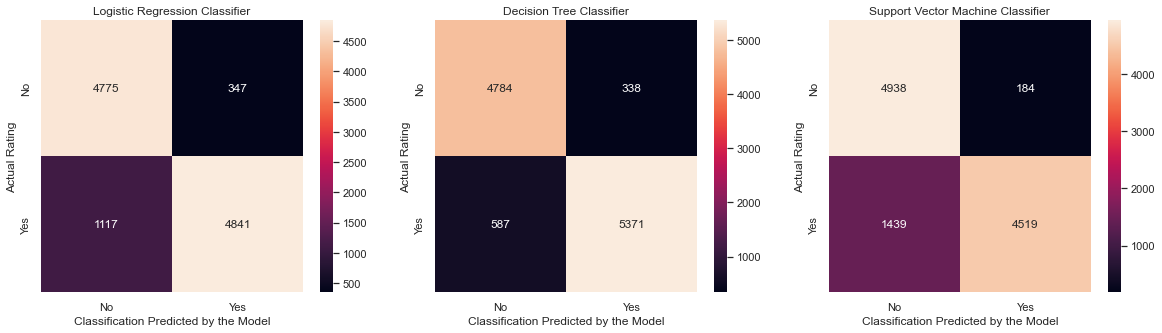

In [47]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

sns.heatmap(cm_lr, fmt='', annot=True,ax=axs[0])

sns.heatmap(cm_dt, fmt='', annot=True,ax=axs[1])

sns.heatmap(cm_svm, fmt='', annot=True,ax=axs[2])

axs[0].set_title('Logistic Regression Classifier')
axs[1].set_title('Decision Tree Classifier')
axs[2].set_title('Support Vector Machine Classifier')

for i in axs:
    i.set_xlabel('Classification Predicted by the Model')
    i.set_ylabel('Actual Rating')

    i.set_xticklabels({"No":0,"Yes":1})
    i.set_yticklabels({"No":0,"Yes":1})

plt.show()

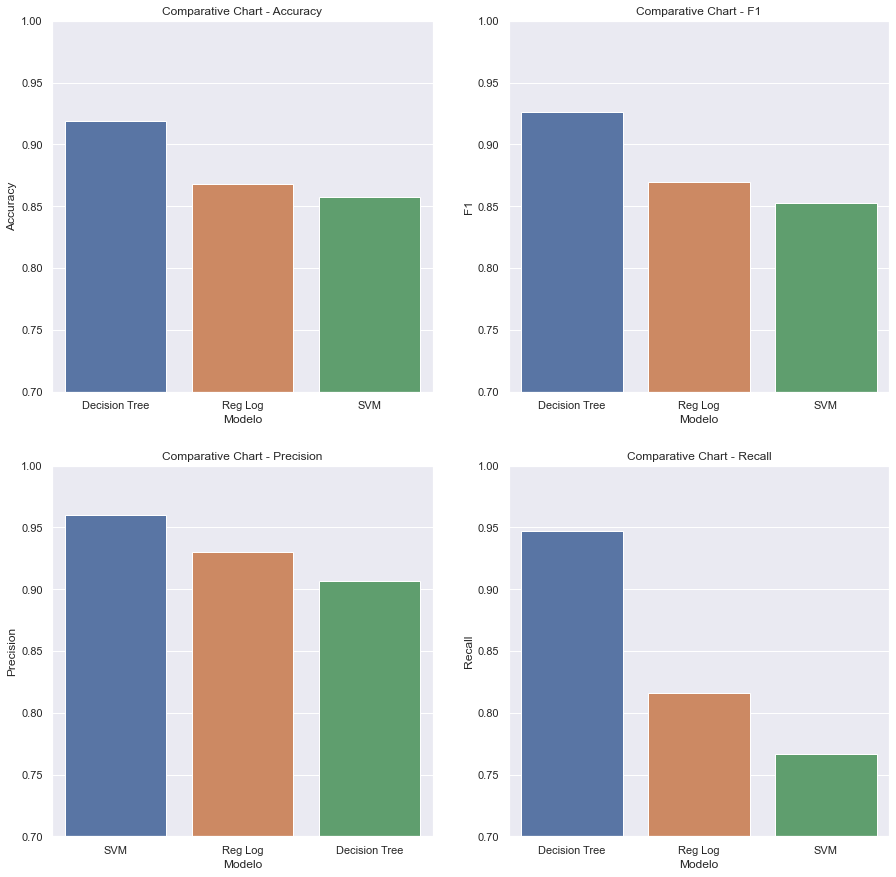

In [127]:
vetor_x = ['Reg Log','Decision Tree', 'SVM']

vetor_y = [ metrics.accuracy_score(df_churn[idxlr][churn_target_col],
                                  df_churn[idxlr]['decision_lr']),
            metrics.accuracy_score(df_churn[idxdt][churn_target_col],
                                  df_churn[idxdt]['decision_dt']),
            metrics.accuracy_score(df_churn[idxsvm][churn_target_col],
                                  df_churn[idxsvm]['decision_svm'])]

vetor_z = [ metrics.f1_score(df_churn[idxlr][churn_target_col],
                                  df_churn[idxlr]['decision_lr']),
            metrics.f1_score(df_churn[idxdt][churn_target_col],
                                  df_churn[idxdt]['decision_dt']),
            metrics.f1_score(df_churn[idxsvm][churn_target_col],
                                  df_churn[idxsvm]['decision_svm'])]

vetor_w = [ metrics.precision_score(df_churn[idxlr][churn_target_col],
                                  df_churn[idxlr]['decision_lr']),
            metrics.precision_score(df_churn[idxdt][churn_target_col],
                                  df_churn[idxdt]['decision_dt']),
            metrics.precision_score(df_churn[idxsvm][churn_target_col],
                                  df_churn[idxsvm]['decision_svm'])]

vetor_k = [ metrics.recall_score(df_churn[idxlr][churn_target_col],
                                  df_churn[idxlr]['decision_lr']),
            metrics.recall_score(df_churn[idxdt][churn_target_col],
                                  df_churn[idxdt]['decision_dt']),
            metrics.recall_score(df_churn[idxsvm][churn_target_col],
                                  df_churn[idxsvm]['decision_svm'])]

vetor_n = [ metrics.roc_curve(df_churn[idxlr][churn_target_col],
                                  df_churn[idxlr]['probability_lr']),
            metrics.roc_curve(df_churn[idxdt][churn_target_col],
                                  df_churn[idxdt]['probability_dt']),
            metrics.roc_curve(df_churn[idxsvm][churn_target_col],
                                  df_churn[idxsvm]['probability_svm'])]

df_f = pd.DataFrame({'Modelo':vetor_x,'Accuracy':vetor_y,'F1':vetor_z, 'Precision':vetor_w, 'Recall':vetor_k, 'ROC':vetor_n})

fig, axs = plt.subplots(2, 2, figsize=(15, 15))

sns.barplot(df_f['Modelo'],df_f['Accuracy'],ax=axs[0,0],order=df_f.sort_values('Accuracy',ascending = False).Modelo)
sns.barplot(df_f['Modelo'],df_f['F1'],ax=axs[0,1],order=df_f.sort_values('F1',ascending = False).Modelo)
sns.barplot(df_f['Modelo'],df_f['Precision'],ax=axs[1,0],order=df_f.sort_values('Precision',ascending = False).Modelo)
sns.barplot(df_f['Modelo'],df_f['Recall'],ax=axs[1,1],order=df_f.sort_values('Recall',ascending = False).Modelo)

axs[0,0].set_title('Comparative Chart - Accuracy')
axs[0,1].set_title('Comparative Chart - F1')
axs[1,0].set_title('Comparative Chart - Precision')
axs[1,1].set_title('Comparative Chart - Recall')

axs[0,0].set_ylim([0.70, 1])
axs[0,1].set_ylim([0.70, 1])
axs[1,0].set_ylim([0.70, 1])
axs[1,1].set_ylim([0.70, 1])

plt.show()

In [47]:
def plot_coefs(model, class_label, target_label_map):
    fig = plt.figure(figsize=(15,4))
    
    iclass = 0
    if class_label != '':
        idx  = target_label_map.target_label==class_label
        iclass = target_label_map.loc[idx, 'target'].values[0]
    
    if len(model.coef_.shape) == 2:
        coefs = model.coef_[iclass]
    else:
        coefs = model.coef_
        
    coef_names = xtrain.columns

    idx = np.argsort(coefs)

    plt.bar(np.arange(coefs.shape[0]), coefs[idx])
    plt.xticks(np.arange(coefs.shape[0]), coef_names[idx], rotation='90')
    plt.title('Coeficientes do modelo ' + model.__class__.__name__ + ' ' + class_label)
    plt.grid()
    plt.xlim((-0.5, coefs.shape[0]-0.5))
    plt.show()
    
    
interact(plot_coefs, model = fixed(model_lr.steps[1][1]), 
         class_label = fixed(''),
         target_label_map = fixed(churn_label_map))

interactive(children=(Output(),), _dom_classes=('widget-interact',))

<function __main__.plot_coefs(model, class_label, target_label_map)>

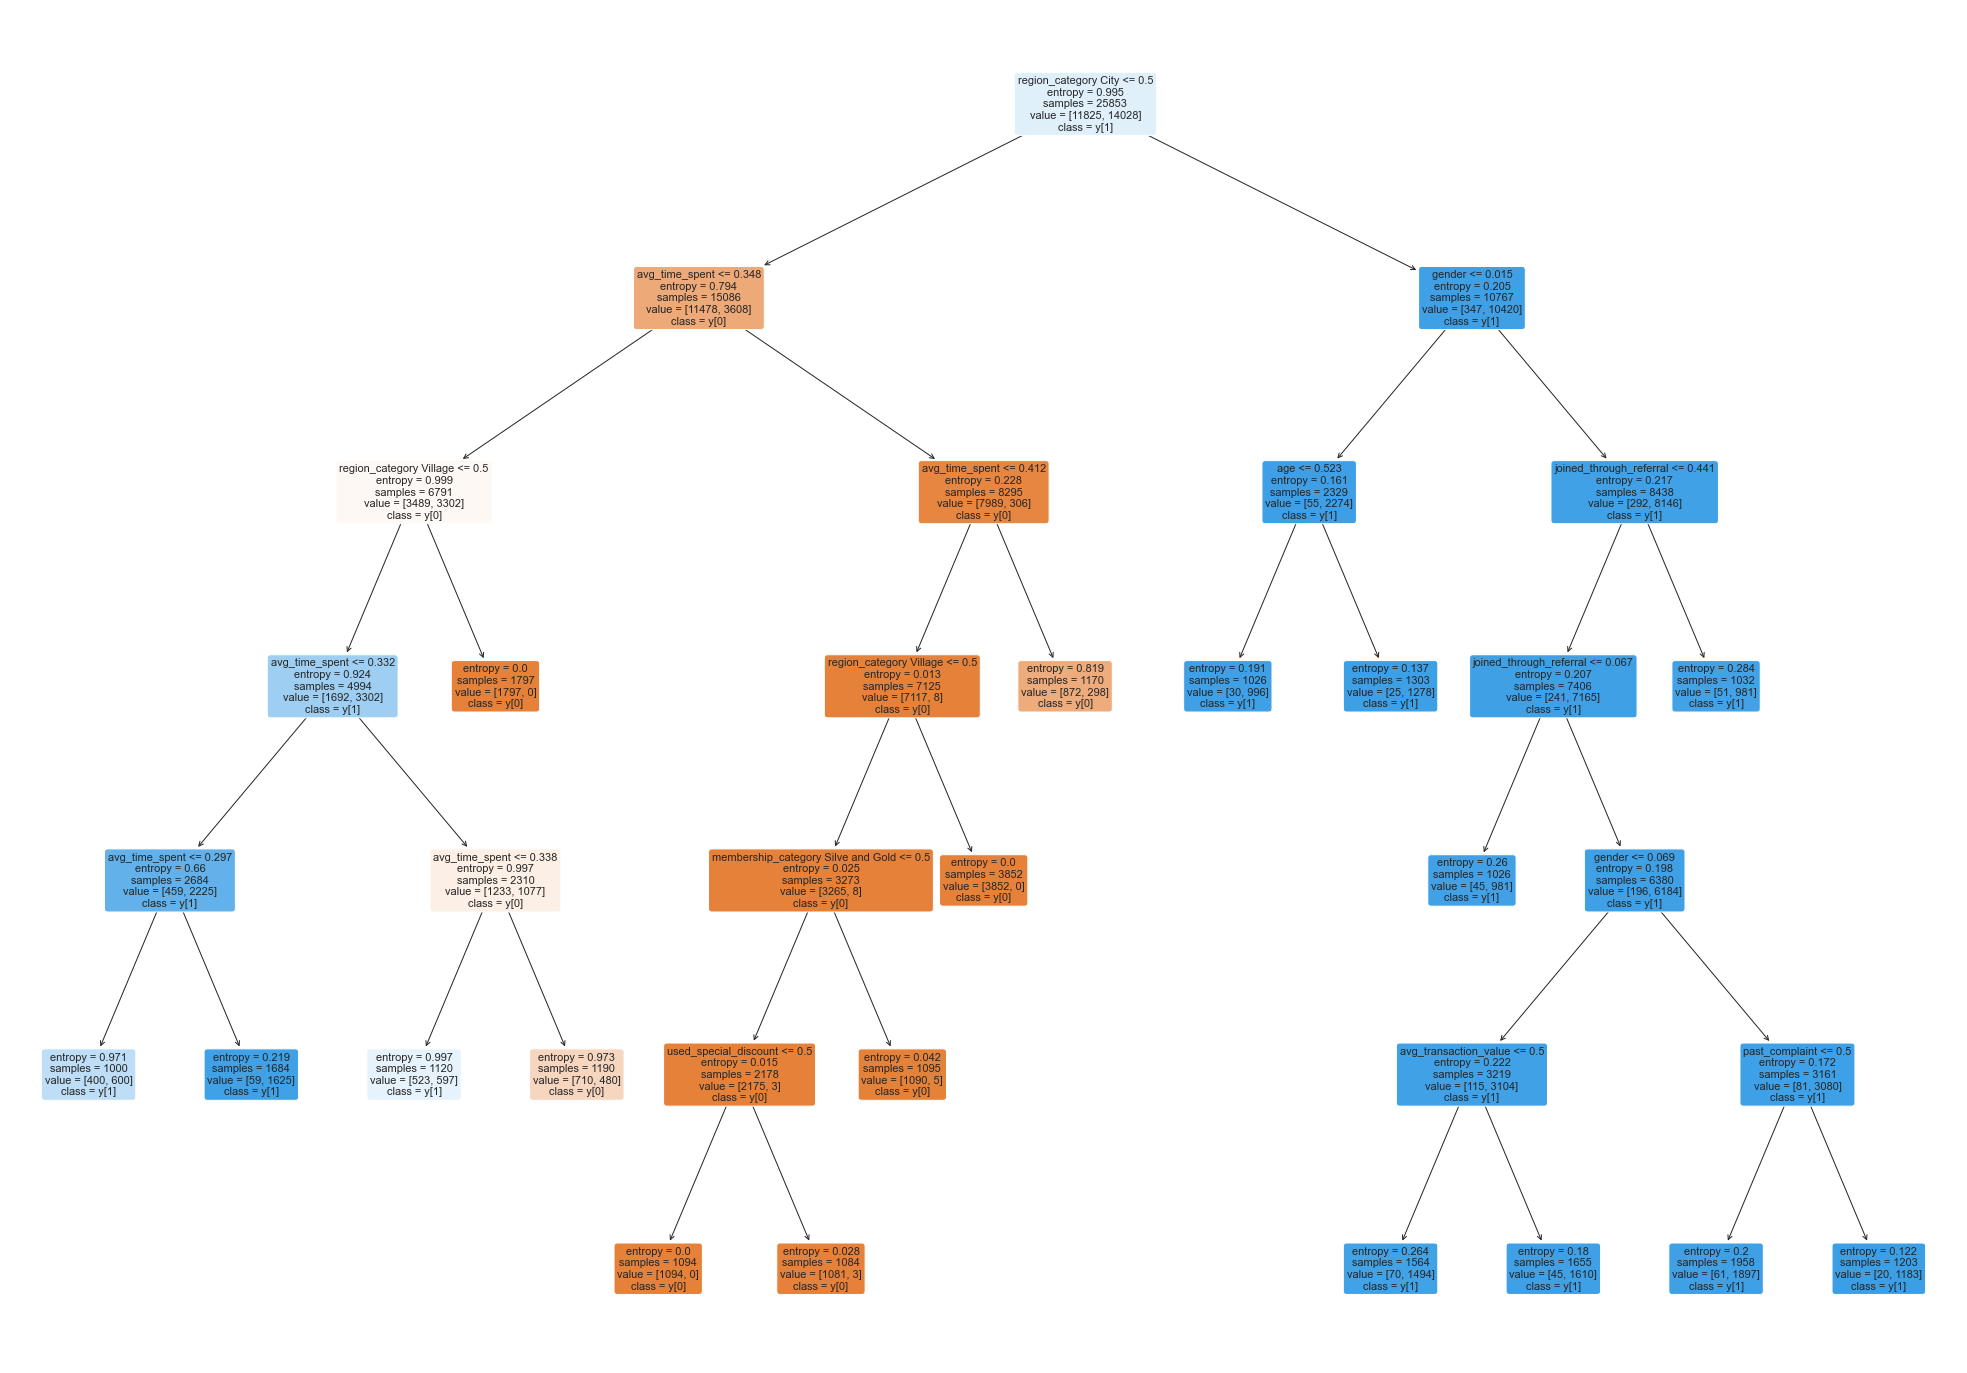

In [214]:
dt_feature_names = list(df_churn.columns)

plt.figure(figsize=(35,25))
tree.plot_tree(model_dt['Model'],feature_names=dt_feature_names,fontsize=11
#               , filled=True, rounded=True)
               ,class_names=True, filled=True, rounded=True)
plt.show()

In [110]:
import warnings
warnings.filterwarnings('ignore')


def plot_operation_threshold(threshold):
    plt.figure(figsize=(12,4))
    # MATRIZ CONFUSAO
    plt.subplot(1,2,1)
    cm = metrics.confusion_matrix(df_churn[idxsvm][churn_target_col],
                                  df_churn[idxsvm]['probability_svm'] > threshold)
    sns.heatmap(cm, annot=True, fmt = '.0f')
    plt.xlabel('Classificação')
    plt.ylabel('Verdade')
    #plt.gca().set_xticklabels(wine_label_map.target_label.values)
    #plt.gca().set_yticklabels(wine_label_map.target_label.values)
    # DISTRIBUICAO PROBABILIDADES
    plt.subplot(1,2,2)
    for i in df_churn[idxsvm][churn_target_col].unique():
        sns.distplot(df_churn[idxsvm][df_churn[idxsvm][churn_target_col] == i].probability_svm,
#                     label=wine_label_map[wine_label_map.target == i].target_label,
                     ax = plt.gca())
    plt.plot([threshold, threshold], [0, plt.axis()[3]], '--k', lw=2, label = 'Corte Operação')
    plt.title('Distribuição de Probabilidade por Classe')
    plt.ylabel('Densidade Estimada')
    plt.xlabel('Probabilidade Alta Qualidade')
    plt.xlim((-0.01,1.01))
    plt.grid()
    plt.legend()
    plt.show()
    # PRINT CLASSIFICATION REPORT
    print(metrics.classification_report(df_churn[idxsvm][churn_target_col],
                                        df_churn[idxsvm]['probability_svm'] > threshold,
#                                        target_names = wine_label_map.target_label))    
                                       ))

interact(plot_operation_threshold, threshold=(0,1,0.1))

interactive(children=(FloatSlider(value=0.0, description='threshold', max=1.0), Output()), _dom_classes=('widg…

<function __main__.plot_operation_threshold(threshold)>

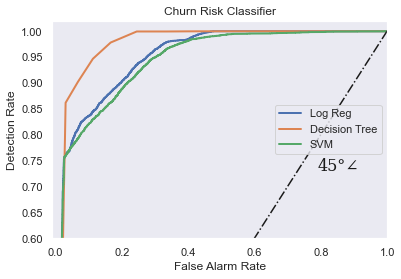

In [199]:

font = {'family': 'serif',
        'color':  'k',
        'weight': 'normal',
        'size': 16
        }

fpr_lr, tpr_lr, thr_lr = metrics.roc_curve(df_churn[idxlr][churn_target_col],
                                  df_churn[idxlr]['probability_lr'])
fpr_dt, tpr_dt, thr_dt = metrics.roc_curve(df_churn[idxdt][churn_target_col],
                                  df_churn[idxdt]['probability_dt'])
fpr_svm, tpr_svm, thr_svm = metrics.roc_curve(df_churn[idxsvm][churn_target_col],
                                  df_churn[idxsvm]['probability_svm'])

plt.plot(fpr_lr, tpr_lr, '-', lw=2, label='Log Reg')
plt.plot(fpr_dt, tpr_dt, '-', lw=2, label='Decision Tree')
plt.plot(fpr_svm, tpr_svm, '-', lw=2, label='SVM')
plt.plot([-.2,1.2], [-.2,1.2], linestyle='-.', color='k')
plt.text(0.79, 0.73, r'45°∠', fontdict=font)


plt.legend(loc='right')
plt.title('Churn Risk Classifier')
plt.grid()
plt.xlabel('False Alarm Rate')
plt.ylabel('Detection Rate')
plt.xlim((-0.01, 1))
plt.ylim((0.6, 1.02))
plt.show()

<font size="3"><div align="left"><span style="color:blue">SVM Toy</span></div></font>

In [87]:
from sklearn.datasets import make_blobs
def plot_svm_margin(nsamples, ncenters, C, kernel,  random_state, margin):
    X, y = make_blobs(n_samples=nsamples, centers=ncenters, random_state=random_state)
    
    def make_meshgrid(x, y, h=.02):
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        return xx, yy
    def plot_contours(ax, clf, xx, yy, **params):
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
        return out
   
 # The classification SVC model
    model = svm.SVC(kernel=kernel, C=C)
    clf = model.fit(X, y)
    fig, ax = plt.subplots()
    # title for the plots
    title = ('Decision surface of linear SVC')
    # Set-up grid for plotting.
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    xy = np.vstack([xx.ravel(), yy.ravel()]).T
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")

 # plot support vectors
    ax.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors="k",
    )
    axis_lims = plt.axis()
    
    if margin and kernel == 'linear':
        # get the separating hyperplane
        xx = np.linspace(xx.min(), xx.max())
        for c in range(clf.coef_.shape[0]):
            w = clf.coef_[c]
            a = -w[0] / w[1]
            yy = a * xx - (clf.intercept_[0]) / w[1]

            # plot the parallels to the separating hyperplane that pass through the
            # support vectors (margin away from hyperplane in direction
            # perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
            # 2-d.
            margin = 1 / np.sqrt(np.sum(clf.coef_[c] ** 2))
            yy_down = yy - np.sqrt(1 + a ** 2) * margin
            yy_up = yy + np.sqrt(1 + a ** 2) * margin

            # plot the line, the points, and the nearest vectors to the plane
            plt.plot(xx, yy, "k-", alpha=0.5)
            plt.plot(xx, yy_down, "k--", alpha=0.5)
            plt.plot(xx, yy_up, "k--", alpha=0.5)

    plt.axis(axis_lims)       
    plt.show()
    
    
interact(plot_svm_margin,
         nsamples = [100, 500, 1000],
         ncenters = [2, 3, 4, 5],
         C = [1e-3, 1e-2, 1e-1, 1, 1e2, 1e3],
         kernel = ['linear', 'rbf', 'poly'],
         random_state = [1,2,3,4,5,6],
         margin = True)

interactive(children=(Dropdown(description='nsamples', options=(100, 500, 1000), value=100), Dropdown(descript…

<function __main__.plot_svm_margin(nsamples, ncenters, C, kernel, random_state, margin)>

<font size="3"><div align="left"><span style="color:blue">Training the model - Logistic Regression</span></div></font>

In [110]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import numpy as np
grid_vals = ['none','l1','l2','elasticnet']

# solver : 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
model_map = {
    'none': 'lbfgs',
    'l1': 'liblinear',
    'l2': 'liblinear',
    'elasticnet': 'saga',
}

for modelname, model in model_map.items():
    
    if modelname != 'elasticnet':
        estimator = lm.LogisticRegression(penalty= modelname, solver=model)
        model_LogReg = RFE(estimator=estimator, n_features_to_select=5)
    else:
        estimator = lm.LogisticRegression(penalty= modelname,l1_ratio= 0.5, solver=model)
        model_LogReg = RFE(estimator=estimator, n_features_to_select=5)
    
#    grid = GridSearchCV(model_LogReg, param_grid={'C': [0.01,0.1,1, 10,100,1000]}, cv=cvfold, scoring='accuracy',refit=True, return_train_score=True)
#    n_scores = cross_val_score(model_LogReg, xtrain, ytrain, scoring='accuracy', cv=cvfold, n_jobs=-1, error_score='raise')    
    model_LogReg.fit(xtrain, ytrain)
    yhat_train = model_LogReg.predict(xtrain)
    yhat_test  = model_LogReg.predict(xtest)
    yhat_train1 = model_LogReg.predict_proba(xtrain)[:,1]
    yhat_test1  = model_LogReg.predict_proba(xtest)[:,1]

    
    # Output table
    df_train[modelname] = yhat_train
    df_test[modelname] = yhat_test
    df_train[modelname+'prob'] = yhat_train1
    df_test[modelname+'prob'] = yhat_test1
    model_map[modelname] = model_LogReg
    

df_churn = pandas.concat((df_train, df_test), axis=0)
idxLogReg = df_churn['train_set'] == 0

print('Accuracy\n'+'log_Nn\t', metrics.accuracy_score(df_churn[idxLogReg][churn_target_col], df_churn[idxLogReg]['none']>0.5))
print('log_l1\t', metrics.accuracy_score(df_churn[idxLogReg][churn_target_col], df_churn[idxLogReg]['l1']>0.5))
print('log_l2\t', metrics.accuracy_score(df_churn[idxLogReg][churn_target_col], df_churn[idxLogReg]['l2']>0.5))
print('log_el\t', metrics.accuracy_score(df_churn[idxLogReg][churn_target_col], df_churn[idxLogReg]['elasticnet']>0.5))
print('Number of individuals who left the base:', df_churn[idxLogReg][churn_target_col].sum())
df_churn[idxLogReg].groupby(churn_target_col)[list(model_map.keys())].sum()

df_logreg = Data


df_churn.rename(columns = {'none':'Log. Reg - None', 'l1':'Log. Reg - l1', 'l2':'Log. Reg - l2', 
                           'elasticnet':'Log. Reg - elasticnet','noneprob':'LogR prob', 'l1prob':'Logl1 prob', 
                           'l2prob':'Logl2 prob', 'elasticnetprob':'Logel prob'}, inplace = True)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Accuracy
log_Nn	 0.865710031135779
log_l1	 0.865710031135779
log_l2	 0.8647624204683905
log_el	 0.8653039122783268
Number of individuals who left the base: 4083


,age,gender,joined_through_referral,avg_time_spent,avg_transaction_value,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,region_category Village,...,Log. Reg - l2,Log. Reg - elasticnet,decision_Arv,probability_Arv,decision_SVM,probability_SVM,noneprob,l1prob,l2prob,elasticnetprob
36506,0.188,0,1,0.198,0.448,0.295,0,1,0,0,...,0,0,1,1.0,0,0.445,3.851e-01,3.847e-01,3.827e-01,3.838e-01
23097,0.797,0,1,0.208,0.249,0.332,1,1,0,0,...,0,0,0,0.0,0,0.099,3.153e-08,1.647e-04,9.141e-04,6.029e-04
15658,0.734,1,1,0.108,0.103,0.357,1,1,1,0,...,0,0,0,0.0,0,0.424,4.590e-01,4.586e-01,4.591e-01,4.589e-01
2934,0.578,1,-1,0.150,0.191,0.381,0,1,0,0,...,0,0,0,0.0,0,0.236,3.908e-01,3.913e-01,3.931e-01,3.921e-01
10162,0.547,1,-1,0.087,0.036,0.380,1,1,0,0,...,0,0,0,0.0,0,0.458,4.594e-01,4.593e-01,4.608e-01,4.601e-01


In [96]:
print('Log. Reg - None\n', metrics.classification_report(df_churn[churn_target_col],
                              df_churn['Log. Reg - None'],
                              target_names = ({"Não":0,"Sim":1})))

print('Log. Reg - l1\n', metrics.classification_report(df_churn[churn_target_col],
                              df_churn['Log. Reg - l1'],
                              target_names = ({"Não":0,"Sim":1})))

print('Log. Reg - l2\n', metrics.classification_report(df_churn[churn_target_col],
                              df_churn['Log. Reg - l2'],
                              target_names = ({"Não":0,"Sim":1})))

print('Log. Reg - elasticnet\n', metrics.classification_report(df_churn[churn_target_col],
                              df_churn['Log. Reg - elasticnet'],
                              target_names = ({"Não":0,"Sim":1})))

Log. Reg - None
               precision    recall  f1-score   support

         Não       0.81      0.93      0.87     16950
         Sim       0.93      0.81      0.87     19983

    accuracy                           0.87     36933
   macro avg       0.87      0.87      0.87     36933
weighted avg       0.88      0.87      0.87     36933

Log. Reg - l1
               precision    recall  f1-score   support

         Não       0.81      0.93      0.87     16950
         Sim       0.93      0.81      0.87     19983

    accuracy                           0.87     36933
   macro avg       0.87      0.87      0.87     36933
weighted avg       0.88      0.87      0.87     36933

Log. Reg - l2
               precision    recall  f1-score   support

         Não       0.81      0.93      0.86     16950
         Sim       0.93      0.81      0.87     19983

    accuracy                           0.87     36933
   macro avg       0.87      0.87      0.87     36933
weighted avg       0.88    

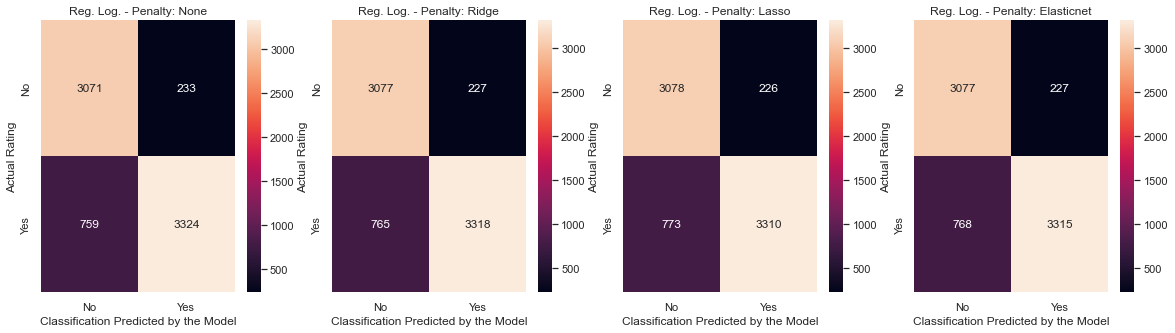

In [97]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")

cf_matrix_1 = confusion_matrix(y_true=df_churn[idxLogReg][churn_target_col], y_pred=df_churn[idxLogReg]['Log. Reg - None'])
cf_matrix_2 = confusion_matrix(y_true=df_churn[idxLogReg][churn_target_col], y_pred=df_churn[idxLogReg]['Log. Reg - l1'])
cf_matrix_3 = confusion_matrix(y_true=df_churn[idxLogReg][churn_target_col], y_pred=df_churn[idxLogReg]['Log. Reg - l2'])
cf_matrix_4 = confusion_matrix(y_true=df_churn[idxLogReg][churn_target_col], y_pred=df_churn[idxLogReg]['Log. Reg - elasticnet'])

fig, axs = plt.subplots(1, 4, figsize=(20, 5))

sns.heatmap(cf_matrix_1, fmt='', annot=True,ax=axs[0])

sns.heatmap(cf_matrix_2, fmt='', annot=True,ax=axs[1])

sns.heatmap(cf_matrix_3, fmt='', annot=True,ax=axs[2])

sns.heatmap(cf_matrix_4, fmt='', annot=True,ax=axs[3])


axs[0].set_title('Reg. Log. - Penalty: None')
axs[1].set_title('Reg. Log. - Penalty: Ridge')
axs[2].set_title('Reg. Log. - Penalty: Lasso')
axs[3].set_title('Reg. Log. - Penalty: Elasticnet')

for i in axs:
    i.set_xlabel('Classification Predicted by the Model')
    i.set_ylabel('Actual Rating')

    i.set_xticklabels({"No":0,"Yes":1})
    i.set_yticklabels({"No":0,"Yes":1})


plt.show()


<font size="3"><div align="left"><span style="color:blue">Training the model - Decision tree</span></div></font>

In [98]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(2, 10)}

estimator = DecisionTreeClassifier(random_state=10)
model_Arv = RFE(estimator=estimator, n_features_to_select=10)

#grid = GridSearchCV(model_Arv, param_grid, cv=cvfold)
#n_scores = cross_val_score(model_Arv, xtrain, ytrain, cv=cvfold)
model_Arv.fit(xtrain, ytrain)

df_train['decision_Arv'] = model_Arv.predict(xtrain)
df_test['decision_Arv']  = model_Arv.predict(xtest)
df_train['probability_Arv'] = model_Arv.predict_proba(xtrain)[:,1]
df_test['probability_Arv']  = model_Arv.predict_proba(xtest)[:,1]

df_churn = pandas.concat((df_train, df_test), axis=0)
idarv = df_churn['train_set'] == 0

0.9071341545959117


[Text(0, 0.5, 'Não'), Text(0, 1.5, 'Sim')]

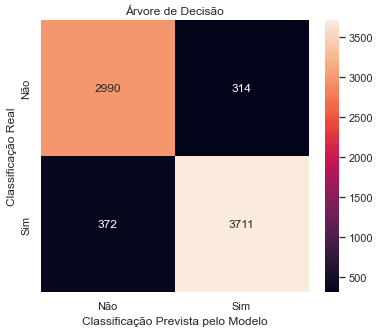

In [99]:
cm = metrics.confusion_matrix(df_churn[idarv][churn_target_col],
                              df_churn[idarv]['decision_Arv'])

print(metrics.accuracy_score(df_churn[idarv][churn_target_col], df_churn[idarv]['decision_Arv']>0.5))

fig, axs = plt.subplots(1, 1, figsize=(6, 5))

sns.heatmap(cm, annot=True, fmt = '.0f')

axs.set_title('Árvore de Decisão')
axs.set_xlabel('Classificação Prevista pelo Modelo')
axs.set_ylabel('Classificação Real')

axs.set_xticklabels({"Não":0,"Sim":1})
axs.set_yticklabels({"Não":0,"Sim":1})

<font size="3"><div align="left"><span style="color:blue">Training the model - SVM</span></div></font>

In [100]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}

model_SVM = svm.SVC(kernel='rbf', C=10, probability=True)
#model_SVM = RFE(estimator=estimator, parameters=parameters)
 
#grid = GridSearchCV(model_SVM, param_grid, cv=cvfold)
#n_scores = cross_val_score(model_SVM, xtrain, ytrain, cv=cvfold)
model_SVM.fit(xtrain, ytrain)

df_train['decision_SVM'] = model_SVM.predict(xtrain)
df_test['decision_SVM']  = model_SVM.predict(xtest)
df_train['probability_SVM'] = model_SVM.predict_proba(xtrain)[:,1]
df_test['probability_SVM']  = model_SVM.predict_proba(xtest)[:,1]

df_churn = pandas.concat((df_train, df_test), axis=0)
idsvm = df_churn['train_set'] == 0

0.8493299038852037


[Text(0, 0.5, 'Não'), Text(0, 1.5, 'Sim')]

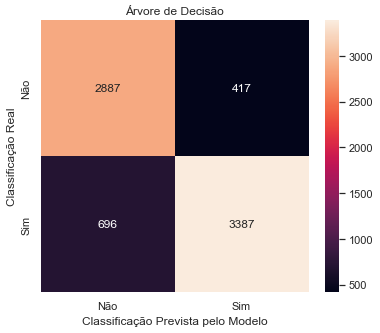

In [101]:
cm = metrics.confusion_matrix(df_churn[idsvm][churn_target_col],
                              df_churn[idsvm]['decision_SVM'])

print(metrics.accuracy_score(df_churn[idsvm][churn_target_col], df_churn[idsvm]['decision_SVM']>0.5))

fig, axs = plt.subplots(1, 1, figsize=(6, 5))

sns.heatmap(cm, annot=True, fmt = '.0f')

axs.set_title('Árvore de Decisão')
axs.set_xlabel('Classificação Prevista pelo Modelo')
axs.set_ylabel('Classificação Real')

axs.set_xticklabels({"Não":0,"Sim":1})
axs.set_yticklabels({"Não":0,"Sim":1})

In [111]:
print('Logistic\t', metrics.accuracy_score(df_churn[idxLogReg][churn_target_col],
                                           df_churn[idxLogReg]['l1prob']>0.5))
print('Arvore de Decisão\t', metrics.accuracy_score(df_churn[idarv][churn_target_col],
                                           df_churn[idarv]['probability_Arv']>0.5))
print('SVM\t', metrics.accuracy_score(df_churn[idsvm][churn_target_col],
                                           df_churn[idsvm]['probability_SVM']>0.5))

Logistic	 0.865710031135779
Random	 0.9071341545959117
SVM	 0.8490591579802356


In [41]:
# Pipeline



#rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 
#param_grid = { 
#    'n_estimators': [200,500, 700],
#    'max_features': ['auto', 'sqrt', 'log2']
#}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(xtrain, ytrain)

print (CV_rfc.best_params_)




model_churn_lr = pipeline.Pipeline([
                                ('scaler', preprocessing.StandardScaler()),
#                                 ('scaler', preprocessing.MinMaxScaler()),
                                ('model', lm.LogisticRegression(penalty='elasticnet'
                                                                ,l1_ratio= 0.4, solver='saga'))
                               ]) 


model_churn_svm = pipeline.Pipeline([
                                ('scaler', preprocessing.StandardScaler()),
#                                 ('scaler', preprocessing.MinMaxScaler()),
                                ('model', svm.SVC(kernel='linear', C=1, probability=True))
                               ]) 


model_churn_rf = pipeline.Pipeline([
                                ('scaler', preprocessing.StandardScaler()),
#                                 ('scaler', preprocessing.MinMaxScaler()),
                                ('model', tree.DecisionTreeClassifier(criterion='entropy', max_depth = 5))
                               ]) 


model_churn_lr.fit(xtrain, ytrain)
df_train['decision_lr'] = model_churn_lr.predict(xtrain)
df_test['decision_lr']  = model_churn_lr.predict(xtest)
df_train['probability_lr'] = model_churn_lr.predict_proba(xtrain)[:,1]
df_test['probability_lr']  = model_churn_lr.predict_proba(xtest)[:,1]



#model_churn_rf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 5)
model_churn_rf.fit(xtrain, ytrain)      
df_train['decision_rf'] = model_churn_rf.predict(xtrain)
df_test['decision_rf']  = model_churn_rf.predict(xtest)
df_train['probability_rf'] = model_churn_rf.predict_proba(xtrain)[:,1]
df_test['probability_rf']  = model_churn_rf.predict_proba(xtest)[:,1]



#model_churn_svm = svm.SVC(kernel='linear', C=1, probability=True)

model_churn_svm = model_churn_svm.fit(xtrain, ytrain)


df_train['decision_svm'] = model_churn_svm.predict(xtrain)
df_test['decision_svm']  = model_churn_svm.predict(xtest)
df_train['probability_svm'] = model_churn_svm.predict_proba(xtrain)[:,1]
df_test['probability_svm']  = model_churn_svm.predict_proba(xtest)[:,1]


df_churn_lr = pandas.concat((df_train, df_test), axis=0)
df_churn_rf = pandas.concat((df_train, df_test), axis=0)
df_churn_svm = pandas.concat((df_train, df_test), axis=0)

idxlr = df_churn_lr['train_set'] == 0
idxrf = df_churn_lr['train_set'] == 0
idxsvm = df_churn_svm['train_set'] == 0




print('Logistic\t', metrics.accuracy_score(df_churn_lr[idxlr][churn_target_col],
                                           df_churn_lr[idxlr]['probability_lr']>0.5))
print('Random\t', metrics.accuracy_score(df_churn_rf[idxrf][churn_target_col],
                                           df_churn_rf[idxrf]['probability_rf']>0.5))
print('SVM\t', metrics.accuracy_score(df_churn_svm[idxsvm][churn_target_col],
                                           df_churn_svm[idxsvm]['probability_svm']>0.5))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


{'max_features': 'auto', 'n_estimators': 500}
Logistic	 0.8636794368485177
Random	 0.9180993637471233
SVM	 0.8489237850277515


In [40]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

rfe = RFE(estimator=tree.DecisionTreeClassifier(), n_features_to_select=6)
model = tree.DecisionTreeClassifier()

model_dt = pipeline.Pipeline([('Feature Selection', rfe), ('Model', model)])
n_scores = cross_val_score(model_dt, xtrain, ytrain, scoring='accuracy', cv=cvfold, n_jobs=-1)
np.mean(n_scores)

model_dt.fit(xtrain, ytrain)

df_train['decision_dt'] = model_dt.predict(xtrain)
df_test['decision_dt']  = model_dt.predict(xtest)
df_train['probability_dt'] = model_dt.predict_proba(xtrain)[:,1]
df_test['probability_dt']  = model_dt.predict_proba(xtest)[:,1]

df_churn = pandas.concat((df_train, df_test), axis=0)
idxdt = df_churn['train_set'] == 0

NameError: name 'wine_label_map' is not defined

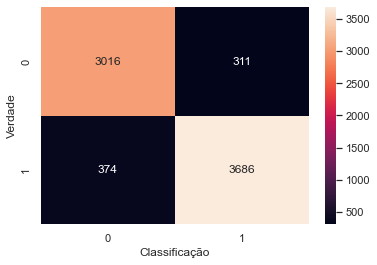

In [41]:
cm_dt = metrics.confusion_matrix(df_churn[idxdt][churn_target_col],
                                  df_churn[idxdt]['decision_dt'])

sns.heatmap(cm_dt, annot=True, fmt = '.0f')

plt.xlabel('Classificação')
plt.ylabel('Verdade')
plt.gca().set_xticklabels(wine_label_map.target_label.values)
plt.gca().set_yticklabels(wine_label_map.target_label.values)

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas
import numpy as np
from sklearn import tree
import sklearn.linear_model as lm
from sklearn import preprocessing, model_selection, pipeline
from sklearn.model_selection import validation_curve
from sklearn import metrics
from sklearn.inspection import permutation_importance

from sklearn import svm



from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

grid_search_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel':['linear', 'rbf', 'poly'],
}


def plot_parameter_validation_curve(param_name, grid_search,
                                    model, model_name, scoring,
                                    logx):
    print('Parameter:', param_name)
    print('GridSearch:', grid_search[param_name])
    print('Scoring:', scoring)
    plt.figure(figsize=(6,4))
    train_scores, test_scores = validation_curve(model,
                                                 X = xtrain, 
                                                 y = ytrain, 
                                                 param_name=param_name, 
                                                 param_range= grid_search[param_name],
                                                 scoring=scoring,
                                                 cv=cvfold,
                                                 n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.title("Curva Validação Modelo " + model_name)
    plt.xlabel(param_name)
    plt.ylabel("Score ("+scoring+")")
    if logx:
        plt.semilogx(grid_search[param_name], train_scores_mean,'-o', label="Treino",
                     color="darkorange", lw=2)
        plt.semilogx(grid_search[param_name], test_scores_mean,'-o', label="Validação-Cruzada",
                     color="navy", lw=2)
    else:
        plt.plot(grid_search[param_name], train_scores_mean,'-o', label="Treino",
                     color="darkorange", lw=2)
        plt.plot(grid_search[param_name], test_scores_mean,'-o', label="Validação-Cruzada",
                 color="navy", lw=2)
    plt.fill_between(grid_search[param_name], train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=2)
    plt.fill_between(grid_search[param_name], test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=2)
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()
    
    
#     
model_wine = svm.SVC(kernel='linear', C=0.1, probability=True)
    
    
interact(plot_parameter_validation_curve,
         param_name = list(grid_search_lr.keys()), 
         grid_search = fixed(grid_search_lr),
         model = fixed(svm.SVC()),
         model_name = fixed('SVM'),
         scoring = classification_scores,
         logx = True
)

interactive(children=(Dropdown(description='param_name', options=('C', 'kernel'), value='C'), Dropdown(descrip…

<function __main__.plot_parameter_validation_curve(param_name, grid_search, model, model_name, scoring, logx)>

<Figure size 432x288 with 0 Axes>

In [126]:
print(model_Arv.n_features_to_select)

10


In [121]:
import graphviz


dot_data = tree.export_graphviz(model_Arv, 
                  leaves_parallel = True,
                  filled=True, rounded=True,  
                  special_characters=True,
                                rotate=False,
                   out_file=None,
                           )
graph = graphviz.Source(dot_data)
# graph.format = "png"
# graph.render("./teste")
graph
#class_names=churn_label_map.target_label.values,
#feature_names= wine_feature_names,

AttributeError: 'RFE' object has no attribute 'tree_'

<font size="3"><div align="left"><span style="color:blue">Confusion Matrix - Reg. Logistica, Random forest e SVM </span></div></font>

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix as cm

cm_lr = metrics.confusion_matrix(df_test['churn_risk_score'],
                              df_test['decision_lr'])

cm_rf = metrics.confusion_matrix(df_test['churn_risk_score'],
                              df_test['decision_rf'])

cm_svm = metrics.confusion_matrix(df_test['churn_risk_score'],
                              df_test['decision_svm'])

print(classification_report(df_test['churn_risk_score']    # List of Actual Values lr
        , df_test['decision_lr']))

print(classification_report(df_test['churn_risk_score']    # List of Actual Values rf
        , df_test['decision_rf']))

print(classification_report(df_test['churn_risk_score']    # List of Actual Values SVM
        , df_test['decision_svm']))

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))


sns.heatmap(cm_lr, annot=True,fmt = '.0f',linewidths=.5,cmap="Blues",ax=axs[0])

sns.heatmap(cm_rf, annot=True, fmt = '.0f',linewidths=.5,cmap="Purples",ax=axs[1])

sns.heatmap(cm_svm, annot=True, fmt = '.0f',linewidths=.5,cmap="Greens",ax=axs[2])

axs[0].set_title('Regressão Logística')
axs[1].set_title('Random Forest')
axs[2].set_title('SVM')

for i in axs:
    i.set_xlabel('Classificação Prevista pelo Modelo')
    i.set_ylabel('Classificação Real')

    i.set_xticklabels({"Não":0,"Sim":1})
    i.set_yticklabels({"Não":0,"Sim":1})



<font size="6"><div align="center"><span style="color:blue">Regressão Logística</span></div></font>

<font size="4"><div align="Left"><span style="color:blue">Treinamento do modelo
</span></div></font>

In [131]:
from sklearn import svm
from sklearn.model_selection import validation_curve
from sklearn.metrics import accuracy_score
grid_search_lr = {
    'C': [0.01, 0.1, 1 ,10, 100, 1000, 10000],
    'penalty': ['l1', 'l2', 'elasticnet', 'none']
}


def plot_parameter_validation_curve(param_name, grid_search,
                                    model, model_name, scoring,
                                    logx):
    print('Parameter:', param_name)
    print('GridSearch:', grid_search[param_name])
    print('Scoring:', scoring)
    
    plt.figure(figsize=(6,4))
    train_scores, test_scores = validation_curve(model,
                                                 X = xtrain, 
                                                 y = ytrain, 
                                                 param_name=param_name, 
                                                 param_range= grid_search[param_name],
                                                 scoring=scoring,
                                                 cv=cvfold,
                                                 n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.title("Curva Validação Modelo " + model_name)
    plt.xlabel(param_name)
    plt.ylabel("Score ("+scoring+")")
    
    
    print('Scoring Value:', train_scores_mean)
    if logx:
        plt.semilogx(grid_search[param_name], train_scores_mean,'-o', label="Treino",
                     color="darkorange", lw=2)
        plt.semilogx(grid_search[param_name], test_scores_mean,'-o', label="Validação-Cruzada",
                     color="navy", lw=2)
    else:
        plt.plot(grid_search[param_name], train_scores_mean,'-o', label="Treino",
                     color="darkorange", lw=2)
        plt.plot(grid_search[param_name], test_scores_mean,'-o', label="Validação-Cruzada",
                 color="navy", lw=2)
    plt.fill_between(grid_search[param_name], train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=2)
    plt.fill_between(grid_search[param_name], test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=2)
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()
    
interact(plot_parameter_validation_curve,
         param_name = list(grid_search_lr.keys()), 
         grid_search = fixed(grid_search_lr),
         model = fixed(lm.LogisticRegression(solver='liblinear')),
         model_name = fixed('Regressão Logística'),
         scoring = classification_scores,
         logx = True
)



interactive(children=(Dropdown(description='param_name', options=('C', 'penalty'), value='C'), Dropdown(descri…

<function __main__.plot_parameter_validation_curve(param_name, grid_search, model, model_name, scoring, logx)>

In [ ]:
grid_search_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel':['linear', 'rbf', 'poly'],
}


def plot_parameter_validation_curve(param_name, grid_search,
                                    model, model_name, scoring,
                                    logx):
    print('Parameter:', param_name)
    print('GridSearch:', grid_search[param_name])
    print('Scoring:', scoring)
    plt.figure(figsize=(6,4))
    train_scores, test_scores = validation_curve(model,
                                                 X = xtrain, 
                                                 y = ytrain, 
                                                 param_name=param_name, 
                                                 param_range= grid_search[param_name],
                                                 scoring=scoring,
                                                 cv=cvfold,
                                                 n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.title("Curva Validação Modelo " + model_name)
    plt.xlabel(param_name)
    plt.ylabel("Score ("+scoring+")")
    if logx:
        plt.semilogx(grid_search[param_name], train_scores_mean,'-o', label="Treino",
                     color="darkorange", lw=2)
        plt.semilogx(grid_search[param_name], test_scores_mean,'-o', label="Validação-Cruzada",
                     color="navy", lw=2)
    else:
        plt.plot(grid_search[param_name], train_scores_mean,'-o', label="Treino",
                     color="darkorange", lw=2)
        plt.plot(grid_search[param_name], test_scores_mean,'-o', label="Validação-Cruzada",
                 color="navy", lw=2)
    plt.fill_between(grid_search[param_name], train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=2)
    plt.fill_between(grid_search[param_name], test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=2)
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()
    
    
#     
model_wine = svm.SVC(kernel='linear', C=0.1, probability=True)
    
    
interact(plot_parameter_validation_curve,
         param_name = list(grid_search_lr.keys()), 
         grid_search = fixed(grid_search_lr),
         model = fixed(svm.SVC()),
         model_name = fixed('SVM'),
         scoring = classification_scores,
         logx = True
)

Text(0, 0.5, 'Taxa de Detecção')

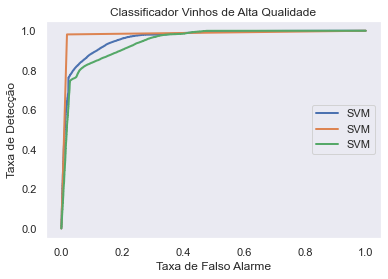

In [133]:
plt.figure(figsize=(6,4))

fpr, tpr, thr = metrics.roc_curve(df_churn[churn_target_col],
                                  df_churn['probability_SVM'])

fpr_1, tpr_1, thr_1 = metrics.roc_curve(df_churn[churn_target_col],
                                  df_churn['probability_Arv'])

fpr_2, tpr_2, thr_2 = metrics.roc_curve(df_churn[churn_target_col],
                                  df_churn['l1prob'])


plt.plot(fpr, tpr, '-', lw=2, label='SVM')
plt.plot(fpr_1, tpr_1, '-', lw=2, label='SVM')
plt.plot(fpr_2, tpr_2, '-', lw=2, label='SVM')

plt.legend(loc='right')
plt.title('Classificador Vinhos de Alta Qualidade')
plt.grid()
plt.xlabel('Taxa de Falso Alarme')
plt.ylabel('Taxa de Detecção')
